In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
df=pd.read_csv('gld_price_data.csv')

In [18]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Text(0, 0.5, 'GLD')

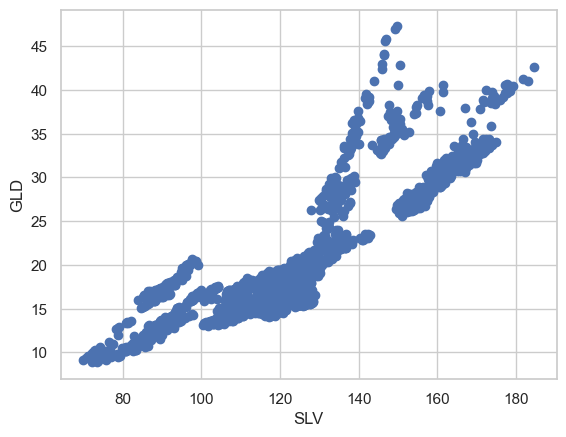

In [19]:
plt.scatter(df['GLD'],df['SLV'])
plt.xlabel("SLV")
plt.ylabel("GLD")

In [22]:
df = df.drop(['Date', 'SPX', 'USO', 'EUR/USD'], axis=1)

In [23]:
df.head()

,GLD,SLV
0,84.860001,15.180
1,85.570000,15.285
2,85.129997,15.167
3,84.769997,15.053
4,86.779999,15.590


In [25]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         GLD    SLV
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
2285  False  False
2286  False  False
2287  False  False
2288  False  False
2289  False  False

[2290 rows x 2 columns]>

In [24]:
df.describe()

,GLD,SLV
count,2290.000000,2290.000000
mean,122.732875,20.084997
std,23.283346,7.092566
min,70.000000,8.850000
25%,109.725000,15.570000
50%,120.580002,17.268500
75%,132.840004,22.882500
max,184.589996,47.259998


In [27]:
correlation=df.corr()

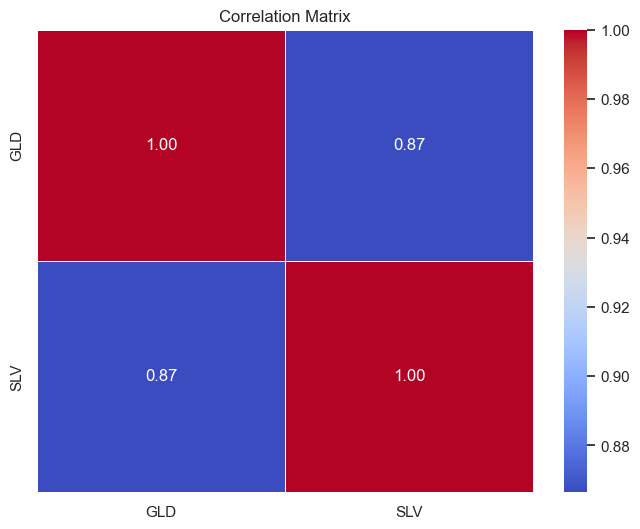

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


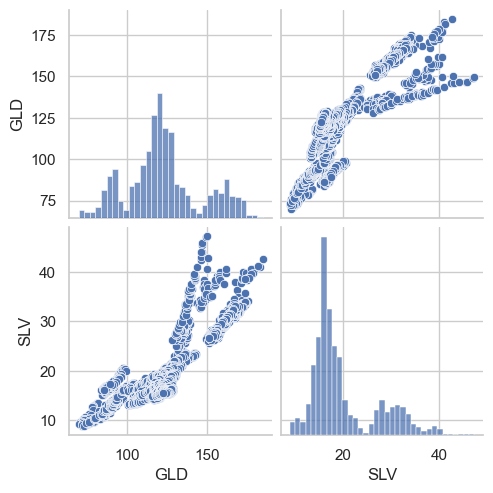

In [29]:
sns.pairplot(df)

In [30]:
x=df[['SLV']]
y=df['GLD']

In [31]:
np.array(x).shape


(2290, 1)

In [32]:
np.array(y).shape

(2290,)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [34]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [35]:
x_test = scaler.transform(x_test)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regression=LinearRegression(n_jobs=-1)

In [38]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

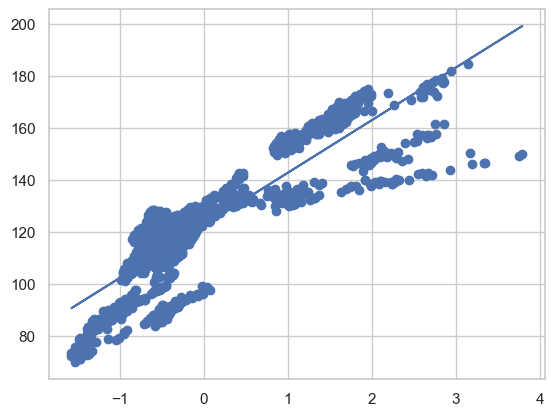

In [39]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [40]:
y_pred=regression.predict(x_test)

In [41]:
from sklearn.metrics import r2_score

In [42]:
score=r2_score(y_test,y_pred)
print(score)

0.7622063769568059


In [43]:
regression.predict(scaler.transform([[15.123]]))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([108.37423738])

In [44]:
regression.predict(scaler.transform([[12.111]]))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([99.87038056])